# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [34]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset? 


Investigating its distribution means analyzing how many samples each class has.
A dataset is "imbalanced" when one class (or several) has significantly more samples than the others.

In [36]:

# Distribution of the target variable (fraud)

target_counts = fraud['fraud'].value_counts()
print("Target variable distribution:")
print(target_counts)



Target variable distribution:
fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [37]:
# Proportions 

target_percentages = fraud['fraud'].value_counts(normalize=True) * 100
print("\nTarget percentages:")
print(target_percentages)




Target percentages:
fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


/tmp/ipykernel_30112/2678315795.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


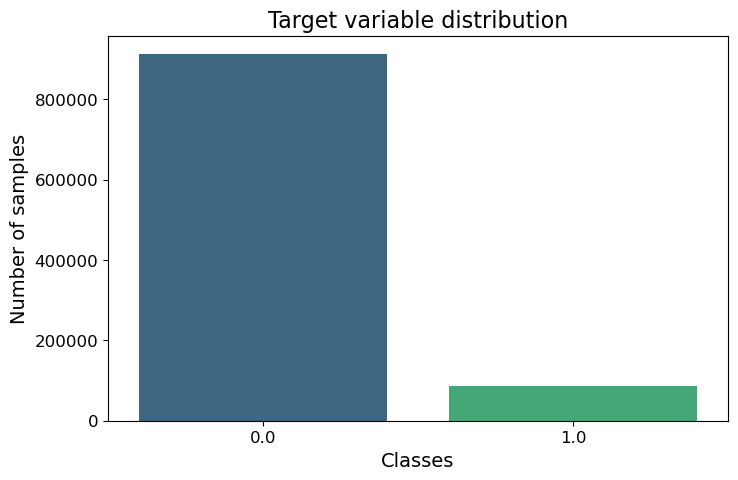

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title('Target variable distribution', fontsize=16)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of samples', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


We can say that the dataset IS, imbalanced.

- **2.** Train a LogisticRegression.

In [39]:
# Exploring the data
print(fraud.head())
print(fraud.shape)
print(fraud.dtypes)

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  
(1000000, 8)
d

In [40]:
# Cleaning null values
fraud.isnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False


In [41]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

The dataset has no null values

In [42]:
# Defining Target and features

In [43]:
target = fraud['fraud']

In [44]:
fraud.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [45]:
features = fraud[['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']]

In [46]:
print(features)

        distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2                             0.427715       

In [47]:
# Checking the dimensions

print(features.shape)
print(target.shape)

(1000000, 7)
(1000000,)


In [48]:
# Spliting the data into test and training

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = features
y = target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [52]:
print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)

X_train size: (800000, 7)
X_test size: (200000, 7)
y_train size: (800000,)
y_test size: (200000,)


In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)

In [54]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
# Predictions in the test data
y_pred =lr.predict(X_test)


In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

In [58]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


Accuracy is NOT the best metric for imbalanced datasets.

Métricas adecuadas para datasets desbalanceados:

- **F1-Score**: Es el promedio armónico entre la precisión (precision) y la exhaustividad (recall). Es útil cuando las clases minoritarias son importantes.
- **Precision**: Evalúa qué proporción de las predicciones positivas son correctas.
- **Recall (Sensibilidad)**: Evalúa qué proporción de las muestras positivas reales fueron correctamente identificadas.
- **ROC-AUC (Área bajo la curva ROC)**: Mide la capacidad del modelo para diferenciar entre clases.
- **PR-AUC (Área bajo la curva Precision-Recall)**: Específicamente útil para datasets desbalanceados porque se centra en las clases positivas.

Reporte de Clasificación:


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000



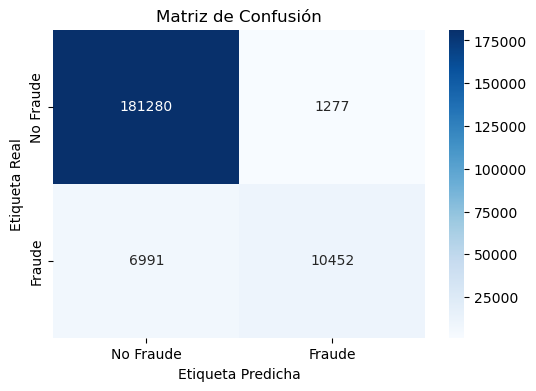

ROC-AUC: 0.97


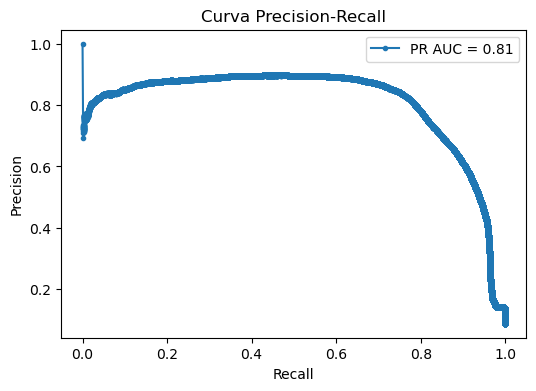

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Hacer predicciones
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# 1. Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 2. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

# 3. Métrica ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# 4. Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label=f"PR AUC = {pr_auc:.2f}")
plt.title("Curva Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 

In [60]:
from imblearn.over_sampling import RandomOverSampler

In [61]:
model = RandomOverSampler()

In [62]:
X1, y1 = model.fit_resample(X_train, y_train)

In [63]:
lr.fit(X1, y1)

LogisticRegression(max_iter=1000)

In [64]:
y1_pred =lr.predict(X_test)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000



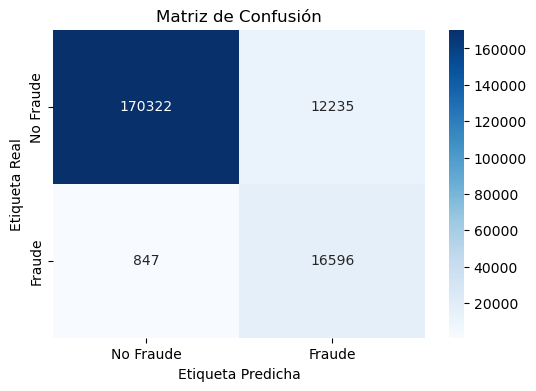

ROC-AUC: 0.97


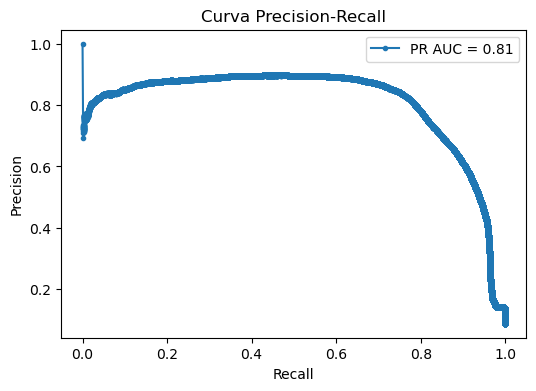

In [66]:
# Hacer predicciones
y1_pred = lr.predict(X_test)
y1_prob = lr.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

# 1. Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 2. Matriz de confusión
conf_matrix = confusion_matrix(y_test, y1_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraude", "Fraude"], yticklabels=["No Fraude", "Fraude"])
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

# 3. Métrica ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC: {roc_auc:.2f}")

# 4. Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', label=f"PR AUC = {pr_auc:.2f}")
plt.title("Curva Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 